About the datasets

 - **discoveries.csv**: time series dataset that contains the number of "great" inventions and scientific discoveries from 1860 to 1959
 - **co2_levels.csv**: the weekly measurements of CO2 levels at the Mauna Loa Observatory, Hawaii.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set()

In [103]:
#Set the style
plt.style.use('fivethirtyeight')

In [108]:
#Discoveries Dataset
discoveries = pd.read_csv("discoveries.csv")

In [109]:
discoveries.head()

,date,Y
0,01-01-1860,5
1,01-01-1861,3
2,01-01-1862,0
3,01-01-1863,2
4,01-01-1864,0


In [110]:
# Printing the data type of each column in discoveries
discoveries.dtypes

date    object
Y        int64
dtype: object

In [111]:
discoveries.tail()

,date,Y
95,01-01-1955,1
96,01-01-1956,0
97,01-01-1957,0
98,01-01-1958,2
99,01-01-1959,0


In [112]:
# Converting the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Printing the data type of each column in discoveries, again
print(discoveries.dtypes)

date    datetime64[ns]
Y                int64
dtype: object


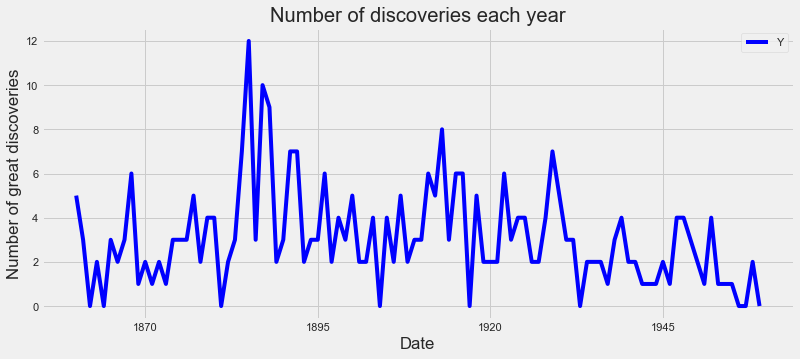

In [113]:
# Setting the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index("date")

# Ploting the time series in the DataFrame
ax = discoveries.plot(color="blue", figsize=(12,5))

# Specifying the x-axis label 
ax.set_xlabel('Date')

# Specifying the y-axis label 
ax.set_ylabel('Number of great discoveries')
ax.set_title('Number of discoveries each year')

# Show plot
plt.show()

The largest number of great discoveries happened during the year of 1885

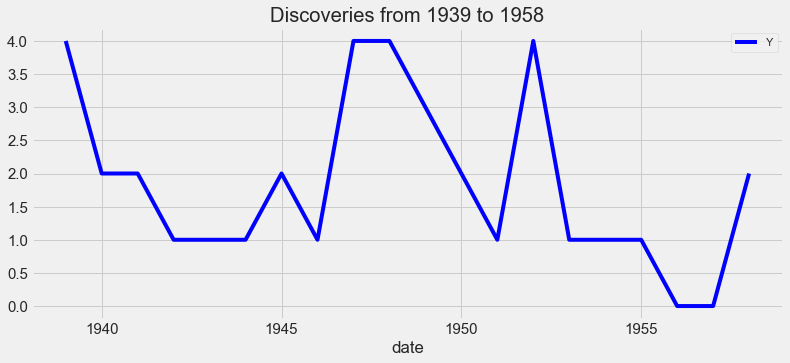

In [114]:
# Selecting the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939':'1958']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15, figsize=(12,5))
ax.set_title("Discoveries from 1939 to 1958")

# Show plot
plt.show()

## Add vertical and horizontal markers

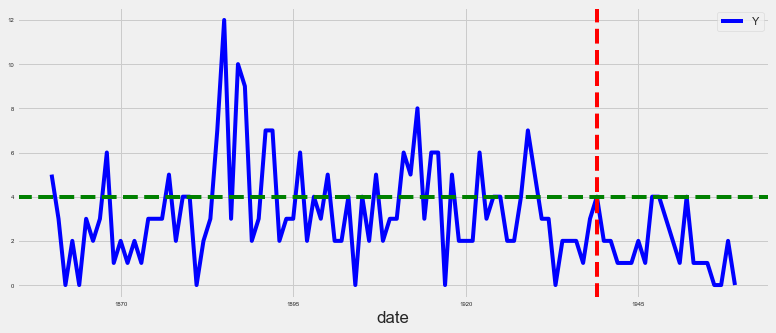

In [115]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6, figsize=(12,5))

# Add a red vertical line
ax.axvline("1939-01-01", color="red", linestyle='--')

# Add a green horizontal line
ax.axhline(4, color="green", linestyle='--')

plt.show()

## Add shaded regions to plots

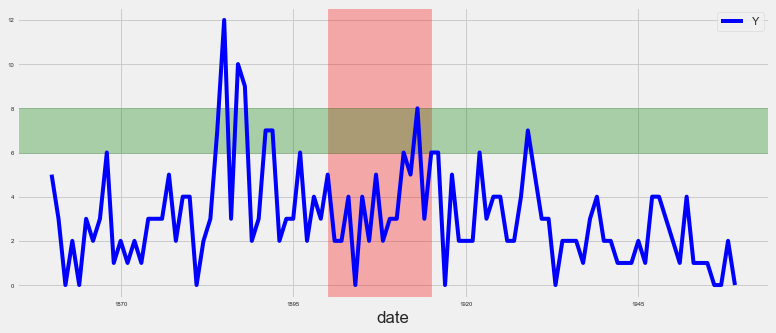

In [116]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6, figsize=(12,5))

# Adding a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color="red", alpha=0.3)

# Adding a horizontal green shaded region
ax.axhspan(6, 8, color="green", alpha=0.3)

plt.show()

# Summary Statistics and Diagnostics on Carbon Dioxide Dataset

In [117]:
co2_levels = pd.read_csv("co2_levels.csv")

In [118]:
co2_levels.datestamp = pd.to_datetime(co2_levels.datestamp)

In [119]:
co2_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
datestamp    2284 non-null datetime64[ns]
co2          2225 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


In [120]:
# Set datestamp column as index
co2_levels = co2_levels.set_index("datestamp")

# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method="bfill")

### Rolling averages

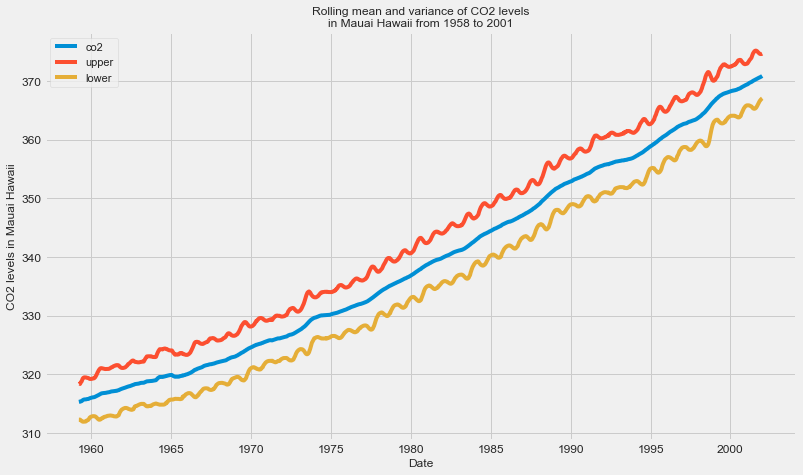

In [121]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd["co2"])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd["co2"])
# ma = ma.dropna()

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=4, fontsize=12, figsize=(12,7))

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=12)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=12)
# plt.gcf().autofmt_xdate()
plt.show()

### Displaying aggregated values for each month

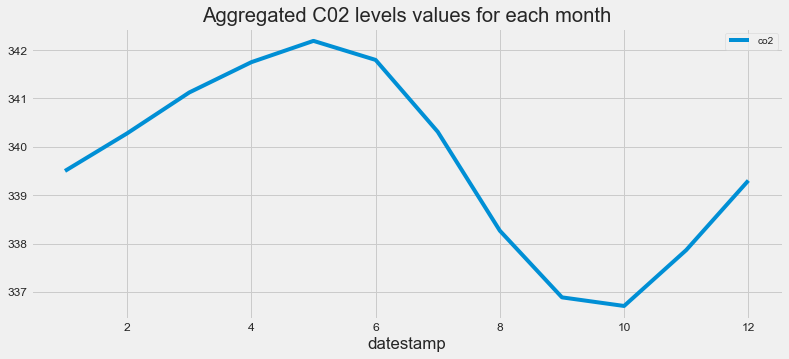

In [122]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
ax=mean_co2_levels_by_month.plot(fontsize=12, figsize=(12,5))
ax.set_title("Aggregated C02 levels values for each month")

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!